## Continuous Dataset
Create the dataset according to Zhu paper. Four previous time steps to predict the next time step.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import h5py
import cv2
import os 

In [3]:
# Load Salvus data
path = "../NoCrack/Simple_Homogeneous_Moseley/Event0000/output.h5"
hf = h5py.File(path, 'r')

# Create output dir 
dir_name = 'Simple_Homogeneous_Moseley/'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

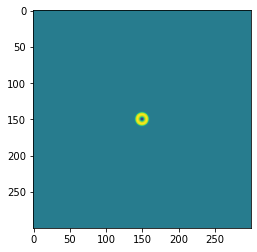

In [4]:
# # # Small data - First timestep
timestep = 10

df_test = pd.DataFrame()
df_test['X'] = hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_test['Y'] = hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)
df_test['T'] = timestep
df_test['True'] = hf['volume']['phi'][timestep][:,0].mean(axis=1)

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

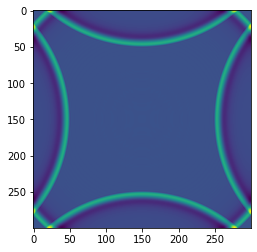

In [5]:
# # # Small data - Last timestep
timestep = 200

df_test = pd.DataFrame()
df_test['X'] = hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_test['Y'] = hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)
df_test['T'] = timestep
df_test['True'] = hf['volume']['phi'][timestep][:,0].mean(axis=1)

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

In [7]:
# CSV to store figure name
csv_name = pd.DataFrame()

# CSV to store figure
df_figure = pd.DataFrame()
df_figure['X'] = hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_figure['Y'] = hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)

for i,fig_i in enumerate(range(10,200+1)):
    
    df_figure['Pressure'] = hf['volume']['phi'][fig_i][:,0].mean(axis=1) # Add pressure
    df_show = df_figure.pivot_table(values='Pressure',index='Y',columns='X').sort_index(axis=0,ascending=False) # Pivot Table to reorder the data

    name_0 = f'Simple_Homogeneous_Moseley_Event0000_{fig_i}.tiff'
    cv2.imwrite(dir_name + name_0,df_show.values) # Save figure

    # For the first figure - save the four previous timesteps
    if i == 0:
        for im in range(1,5):
            df_figure['Pressure'] = hf['volume']['phi'][fig_i-im][:,0].mean(axis=1)
            df_show = df_figure.pivot_table(values='Pressure',index='Y',columns='X').sort_index(axis=0,ascending=False)

            name = f'Simple_Homogeneous_Moseley_Event0000_{fig_i-im}.tiff'
            cv2.imwrite(dir_name + name,df_show.values)

    csv_name.loc[i,'y'] = name_0
    csv_name.loc[i,'y_number'] = fig_i

# Save csv with figure name
csv_name.to_csv('Simple_Homogeneous_Moseley_Event0000_Continuous.csv')

1
2
3
4
